# Working with Tabular Data
Tabular data lesson from the MoISSI workshop

In [1]:
import os
import numpy

In [2]:
distance_file = os.path.join('data', 'distance_data_headers.csv')
print(distance_file)

data/distance_data_headers.csv


In [3]:
# use the numpy function genfromtxt to read in the data
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+,-./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, like=None)
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strin

In [6]:
distances = numpy.genfromtxt(fname=distance_file, delimiter = ',', dtype='unicode')

In [7]:
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [8]:
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [10]:
# Take a slice of the data that is just the numerical vaules. Call this slice data.
data = distances[1:]
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [13]:
data = data.astype(float)

In [14]:
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [15]:
#array_name[row,column]
print(data[2,1])

9.0066


In [17]:
# What will be the output of this code?
element1 = data[0,1]
element2 = data[1,0]
print(element1)
print(element2)

8.9542
2.0


In [18]:
#new_array = array_name[start:end,start:end]
small_data = data[0:10,0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [19]:
array1 = small_data[5,:]
array2 = small_data[:,1:]
print(array1)
print(array2)

[6.     9.0462 6.2553]
[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [21]:
thr4_atp = data[:,1]
average = numpy.mean(thr4_atp)
print(average)

10.876950930000001


In [26]:
# range for loops: range(start,end)
# num_colums = len(headers)
num_columns = len(data[0,:])
print(num_colums)

5


In [27]:
for num in range(1,num_columns):
    column = data[:,num]
    avg_col = numpy.mean(column)
    print(F'{headers[num]}: {avg_col:.3f}')

THR4_ATP: 10.877
THR4_ASP: 7.342
TYR6_ATP: 11.210
TYR6_ASP: 10.993


## Plotting
Creating plots using matplotlib.

In [31]:
import matplotlib.pyplot as plt

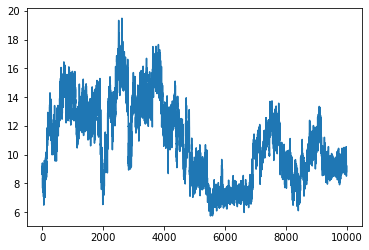

In [32]:
plt.figure()
plt.plot(data[:,1])

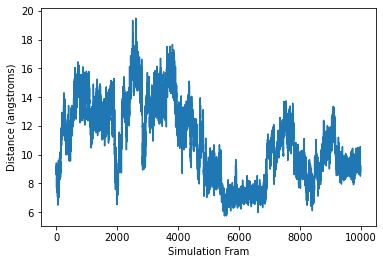

In [33]:
plt.figure()
plt.xlabel("Simulation Fram")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:,1])

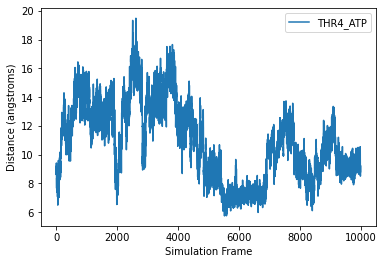

In [37]:
#Pull out the name of the first colum of data. Save it with the variable name sample
sample = headers[1]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:,1], label=sample)
plt.legend()

# Save the figure
plt.savefig(F"{sample}.png")

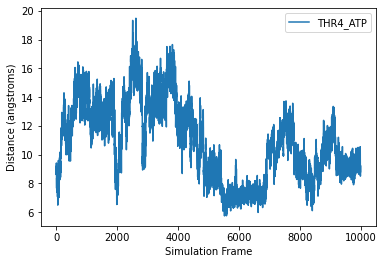

In [39]:
sample = headers[1]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:,1], label=sample)
plt.legend()

# Save the figure
plt.savefig(F"{sample}.png", dpi=300)

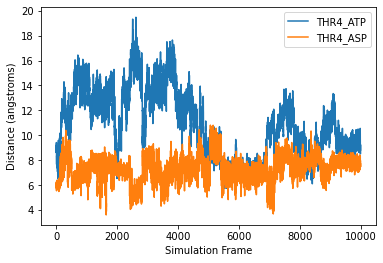

In [40]:
# Plot two sets of data on the same graph
sample = headers[1]
sample2 = headers[2]

plt.figure()
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstroms)")
plt.plot(data[:,1], label=sample)
plt.plot(data[:,2], label=sample2)
plt.legend()

In [41]:
for col in range(1, num_columns):
    print(col)

1
2
3
4


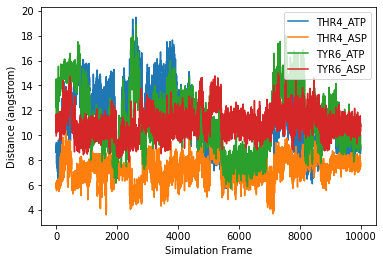

In [43]:
plt.figure()

for col in range(1, num_columns):
    sample = headers[col]
    
    plt.plot(data[:, col], label=sample)
    
plt.xlabel("Simulation Frame")
plt.ylabel("Distance (angstrom)")
plt.legend()

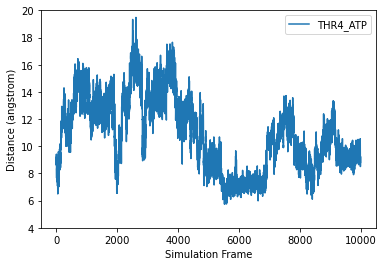

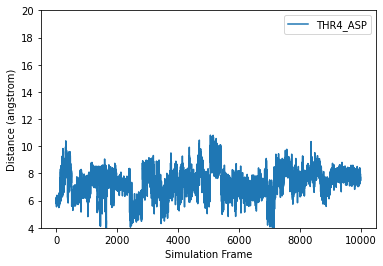

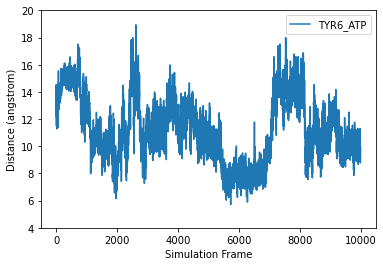

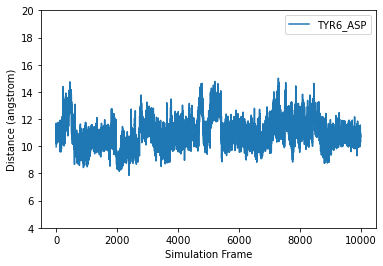

In [45]:
# Exercise - Modify your for loop to create a plot for each column.

for col in range(1, num_columns):
    plt.figure()
    sample = headers[col]
    plt.plot(data[:, col], label=sample)
    plt.xlabel("Simulation Frame")
    plt.ylabel("Distance (angstrom)")
    # Make all y axes on range from 4 to 20
    plt.ylim(4,20)
    
    plt.legend()
    plt.savefig(f"{sample}.png")

In [46]:
headers[0]

'Frame'

In [47]:
small_data

array([[ 1.    ,  8.9542,  5.8024],
       [ 2.    ,  8.6181,  6.0942],
       [ 3.    ,  9.0066,  6.0637],
       [ 4.    ,  9.2002,  6.0227],
       [ 5.    ,  9.1294,  5.9365],
       [ 6.    ,  9.0462,  6.2553],
       [ 7.    ,  8.8657,  5.9186],
       [ 8.    ,  9.3256,  6.2351],
       [ 9.    ,  9.4184,  6.1993],
       [10.    ,  9.06  ,  6.0478]])

In [49]:
# New slicing syntax - get every other row.
#array[start:stop:interval]
data[:10:2]

array([[ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557],
       [ 3.    ,  9.0066,  6.0637, 13.0924, 11.3043],
       [ 5.    ,  9.1294,  5.9365, 13.5321, 10.6279],
       [ 7.    ,  8.8657,  5.9186, 12.9312, 10.2176],
       [ 9.    ,  9.4184,  6.1993, 13.2614, 10.366 ]])

In [54]:
# Get every 100th vaulue 
x_data = data[0::100, 0]
print(x_data)
y_data = data[0::100, 1]

[1.000e+00 1.010e+02 2.010e+02 3.010e+02 4.010e+02 5.010e+02 6.010e+02
 7.010e+02 8.010e+02 9.010e+02 1.001e+03 1.101e+03 1.201e+03 1.301e+03
 1.401e+03 1.501e+03 1.601e+03 1.701e+03 1.801e+03 1.901e+03 2.001e+03
 2.101e+03 2.201e+03 2.301e+03 2.401e+03 2.501e+03 2.601e+03 2.701e+03
 2.801e+03 2.901e+03 3.001e+03 3.101e+03 3.201e+03 3.301e+03 3.401e+03
 3.501e+03 3.601e+03 3.701e+03 3.801e+03 3.901e+03 4.001e+03 4.101e+03
 4.201e+03 4.301e+03 4.401e+03 4.501e+03 4.601e+03 4.701e+03 4.801e+03
 4.901e+03 5.001e+03 5.101e+03 5.201e+03 5.301e+03 5.401e+03 5.501e+03
 5.601e+03 5.701e+03 5.801e+03 5.901e+03 6.001e+03 6.101e+03 6.201e+03
 6.301e+03 6.401e+03 6.501e+03 6.601e+03 6.701e+03 6.801e+03 6.901e+03
 7.001e+03 7.101e+03 7.201e+03 7.301e+03 7.401e+03 7.501e+03 7.601e+03
 7.701e+03 7.801e+03 7.901e+03 8.001e+03 8.101e+03 8.201e+03 8.301e+03
 8.401e+03 8.501e+03 8.601e+03 8.701e+03 8.801e+03 8.901e+03 9.001e+03
 9.101e+03 9.201e+03 9.301e+03 9.401e+03 9.501e+03 9.601e+03 9.701e+03
 9.801

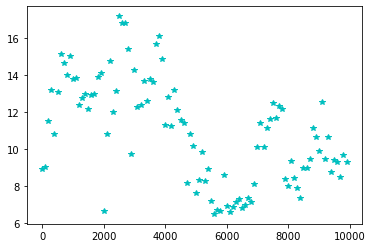

In [64]:
# Plotting with x and y values
plt.figure()
plt.plot(x_data, y_data, '*c')

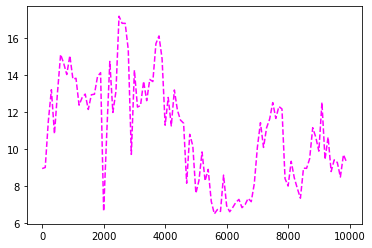

In [65]:
plt.figure()
plt.plot(x_data, y_data,'--', color="#FF00FF")